In [3]:
import numpy as np
from DataLoaders import SynData
import matplotlib.pyplot as plt
from synDataFunctionality.genInputFromLabel import *
import skimage.io

(736, 736)


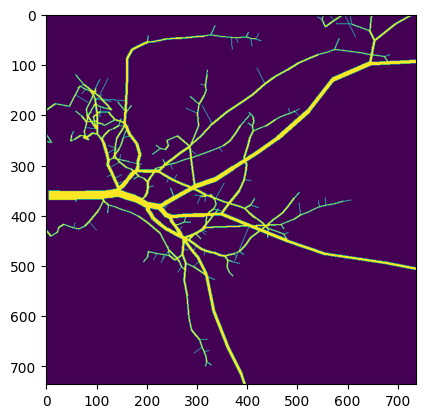

In [4]:
synDat = SynData("SynDat/SynInput", "SynDat/SynLabel")

img, lab = synDat[0]

data = lab[0].numpy()
print(data.shape)
plt.imshow(data)

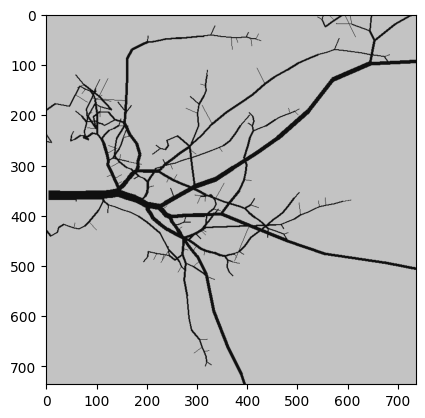

In [5]:
arr = np.array(data.copy()).astype(float)
#print(arr)
bc, ac = gen_colors()
#print(bc)
arr[data == 1] = ac#/255
#print(arr)
arr[data == 0] = bc#/255
#print(arr)
plt.imshow(arr, vmax=255, vmin=0, cmap="gray")

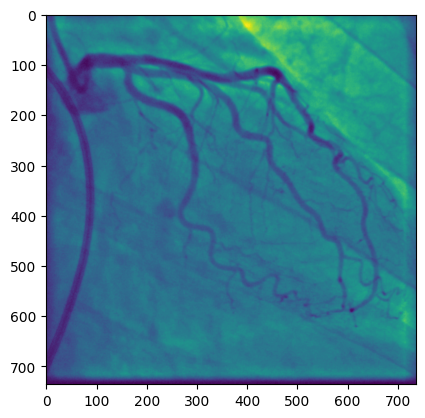

In [6]:
path_dat = "IMG00004_33.tiff"
#r"../../../Orig_data/ImsegmentedPt_02 V_4/IMG00004_33.tiff"

act_dat = np.array(skimage.io.imread(path_dat))

plt.imshow(act_dat)

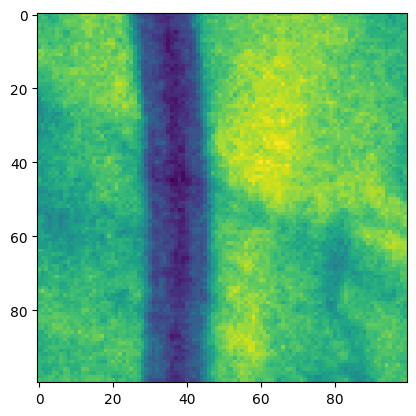

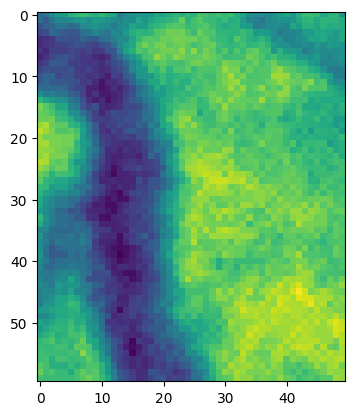

In [7]:
plt.imshow(act_dat[300:400, 50: 150])
plt.show()
plt.imshow(act_dat[240:300, 430: 480])

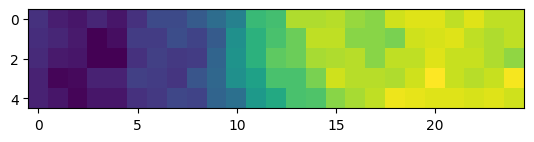

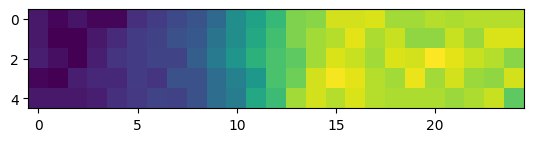

In [8]:
plt.imshow(act_dat[335:340, 85: 110])
plt.show()
plt.imshow(act_dat[270:275, 440: 465])

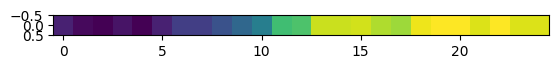

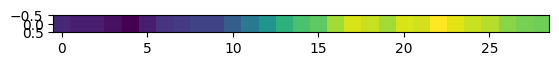

In [9]:
slice1 = act_dat[335:336,85:110]
slice2 = act_dat[272:273, 438: 467]
plt.imshow(slice1)
plt.show()
plt.imshow(slice2)

Evt.: sæt min-val til 0. Dette ændrer ikke std, men gør det lettere at arbejde med. 
Alternativt træk konstant fra data. Dette ændrer ikke std.
Gang data med en eller anden konstant c så data er maks 0. Std er så normaliseret datas std divideret med konstant c 

25
25


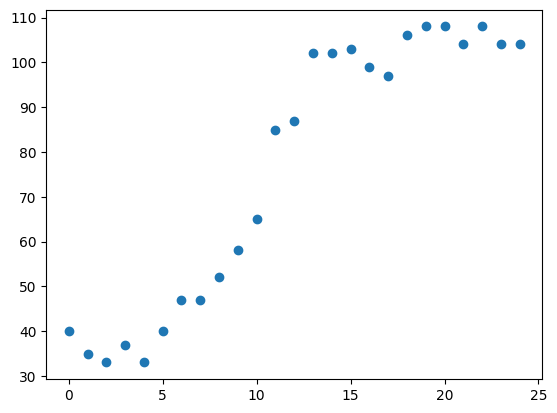

29
29


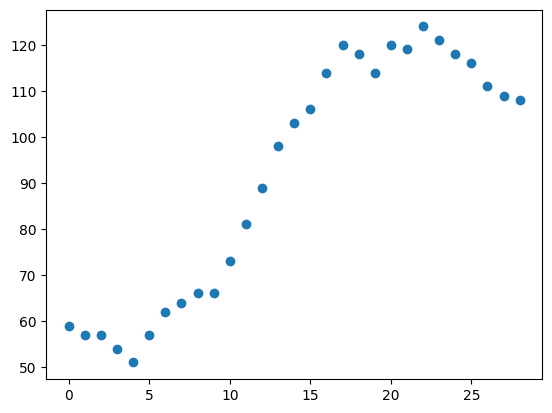

In [10]:
x = np.arange(len(slice1[0]))
print(len(x))
print(len(slice1[0]))
plt.scatter(x, slice1[0])
plt.show()

x2 = np.arange(len(slice2[0]))
print(len(x2))
print(len(slice2[0]))
plt.scatter(x2, slice2[0])
plt.show()

In [28]:
#taken from
#https://stackoverflow.com/questions/60160803/scipy-optimize-curve-fit-for-logistic-function
from scipy.optimize import curve_fit
#fit curve to logistic regression function.
#A is distance between highest and lowest y
#x0 is midpoint
#k is growth rate
#off is how far we are off x=0
def logifunc(x,A,x0,k,off):
    return A / (1 + np.exp(-k*(x-x0)))+off

def indicator(x, mu):
    if x > mu:
        return 105
    else:
        return 36

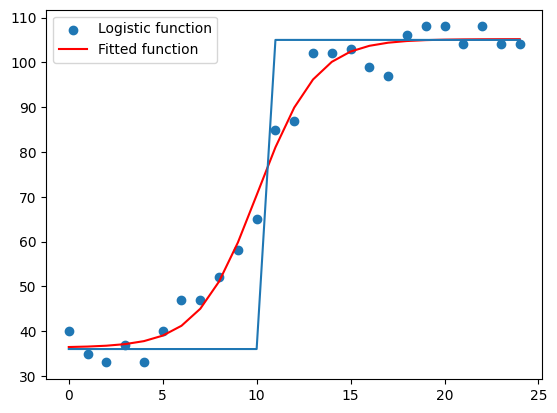

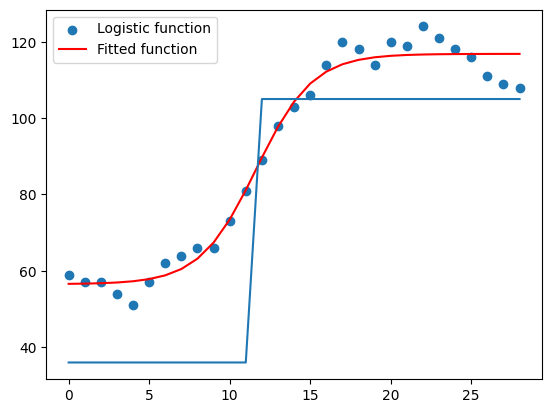

In [29]:
def fitSliceToLogi(imgSlice, guess, illustrate=False):
    y = imgSlice[0]
    x = np.arange(len(imgSlice[0]))
    popt, pcov = curve_fit(logifunc, x, y, guess)
    if illustrate:
        plt.scatter(x,y,label='Logistic function')
        plt.plot(x, logifunc(x, *popt), 'r-',label='Fitted function')
        plt.plot(x, [indicator(i, popt[1]) for i in x])
        plt.legend()
        plt.show()
    return popt


popt1 = fitSliceToLogi(slice1, [90,10,0.3,30], illustrate=True)
popt2 = fitSliceToLogi(slice2, [90,10,0.3,30], illustrate=True)


In [15]:
#sigma af den afledte er da π2/3k2
#https://en.wikipedia.org/wiki/Logistic_function
import math
mu = popt1[1]
k = popt1[2]
sig = (math.pow(math.pi, 2))/(3 * math.pow(k, 2))
print(popt1)

[68.83866941 10.0363982   0.63873156 36.33844433]


In [158]:
#A = popt[0]
#x0 = popt[1]
#k = popt[2]
#off = popt[3]

In [86]:
def logiDerived(x, A, k, x0):
    return A*k*(np.exp(-k*(x-x0)))/np.power((1+np.exp(-k*(x-x0))), 2)

0.11714109343363309


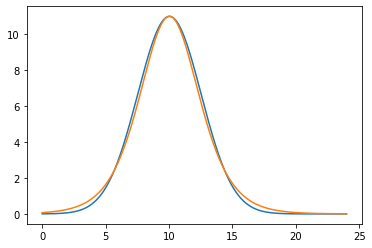

In [245]:
#plot derived of log reg:
from scipy.stats import norm

#print(logifunc(x, *popt))
#print(logiDerived(x, A, k, x0).shape)

#plt.plot(x, logifunc(x, *popt), 'r-',label='Fitted function')
A = popt1[0]
x0 = popt1[1]
k = popt1[2]
off = popt1[3]

x = np.linspace(0.0, 24, num=2000)
mu = x0
std_big = np.power(np.pi, 2)/(3*np.power(k, 2))
print(std_big/A)
std = np.sqrt(np.sum(np.power(logiDerived(x, A, k, x0) - x0, 2))/2000)
p = A*norm.pdf(x, mu, 2.5)
plt.plot(x, p)
plt.plot(x, logiDerived(x, A, k, x0))
plt.show()


#x2 = np.linspace(0.0, 28, num=1000)
#mu2 = popt2[1]
#A2 = popt2[0]
#k2 = popt[2]
#x02 = mu2
#p2 = A2*norm.pdf(x2, mu2, 2.5)
#plt.plot(x2, p2)
#plt.plot(x2, logiDerived(x2, A2, k2, x02))
#plt.show()

Try and recreate original edge between Blood vessel and background

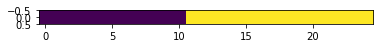

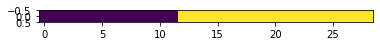

In [208]:
valmin = off
valmax = off + A
mid = x0

def genOrigDat(vmin, vmax, mid, length):
    arr = np.zeros((1, length))
    for i in range(length):
        if i<mid:
            arr[0, i] = vmin
        else:
            arr[0, i] = vmax
    return arr


origSlice = genOrigDat(valmin, valmax, mid, len(slice1[0]))
plt.imshow(origSlice)
plt.show()

origSlice2 = genOrigDat(popt[3], popt[3]+A2, x02, len(slice2[0]))
plt.imshow(origSlice2)

(1, 25)
(1, 25)


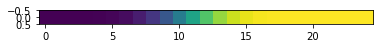

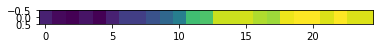

(1, 29)
(1, 29)


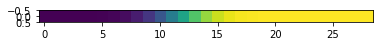

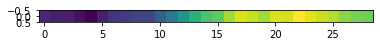

In [209]:
from scipy.ndimage import gaussian_filter
std = 2.5
print(origSlice.shape)
print(slice1.shape)
filter_result = gaussian_filter(origSlice, sigma=std)
plt.imshow(filter_result)
plt.show()
plt.imshow(slice1)
plt.show()

print(origSlice2.shape)
print(slice2.shape)
filter_result2 = gaussian_filter(origSlice2, sigma=std)
plt.imshow(filter_result2)
plt.show()
plt.imshow(slice2)
plt.show()

In [ ]:
plt.imshow(arr, cmap="gray")
plt.show()
arr_w_blur = gaussian_filter(arr, sigma=std)
plt.imshow(arr_w_blur, cmap="gray")